In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Japan.csv')
pd.set_option("max_rows", None)
pd.set_option("max_columns", None)
display(data)

,Date,Infected,Confirmed,Tested,Susceptible,Active,Active/Infected,Recovered,Recovered/Infected,Deaths,Deaths/Infected
0,1-Apr,1992,280,2011,0.139234,227,0.113956,48,0.024096,5,0.002510
1,2-Apr,2244,284,2002,0.141858,252,0.112299,29,0.012923,3,0.001337
2,3-Apr,2553,336,2936,0.114441,309,0.121034,21,0.008226,6,0.002350
3,4-Apr,2857,371,3436,0.107974,304,0.106405,61,0.021351,6,0.002100
4,5-Apr,3178,351,1757,0.199772,321,0.101007,24,0.007552,6,0.001888
5,6-Apr,3412,234,1533,0.152642,234,0.068581,-3,-0.000879,3,0.000879
6,7-Apr,3748,374,9139,0.040924,336,0.089648,36,0.009605,2,0.000534
7,8-Apr,4273,536,6187,0.086633,525,0.122864,4,0.000936,7,0.001638
8,9-Apr,4857,594,2889,0.205607,584,0.120239,2,0.000412,8,0.001647
9,10-Apr,5449,637,4384,0.145301,592,0.108644,33,0.006056,12,0.002202


In [157]:
#CleanData
#Japan has a population of 126.5 million and they test like 4500 people
#a day, and everyone is wondering why their death rate is lower than
#a normal disease, so i just took the number of tested people (265000)
#and used that as the population representing a worst case scenario i suppose
#But i think its pretty obvious most people don't go and get tested for covid there
#Use number of people tested as sample size of population
cData = data[['Tested', 'Active', 'Recovered', 'Deaths']]
display(cData)

,Tested,Active,Recovered,Deaths
0,2011,227,48,5
1,2002,252,29,3
2,2936,309,21,6
3,3436,304,61,6
4,1757,321,24,6
5,1533,234,-3,3
6,9139,336,36,2
7,6187,525,4,7
8,2889,584,2,8
9,4384,592,33,12


In [158]:
#Change to numpy arrays
tested = np.asarray(data['Tested'])
population = np.zeros(30)
#np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)


print("Population Array:")
for i in range(30):
    population[i] = 265000
print(population)

print("Original Tested:")
print(tested[0:30])

print("Original Active:")
active = np.asarray(data['Active'])
print(active[0:30])


print("Original Recovered:")
recovered = np.asarray(data['Recovered'])
print(recovered[0:30])

print("Original Deaths:")
deaths= np.asarray(data['Deaths'])
print(deaths[0:30])



Population Array:
[265000. 265000. 265000. 265000. 265000. 265000. 265000. 265000. 265000.
 265000. 265000. 265000. 265000. 265000. 265000. 265000. 265000. 265000.
 265000. 265000. 265000. 265000. 265000. 265000. 265000. 265000. 265000.
 265000. 265000. 265000.]
Original Tested:
[ 2011  2002  2936  3436  1757  1533  9139  6187  2889  4384  6120  2490
  1321 10849  4685  6467  5669  5159  1285  3909  7825  6037  5396  5617
  5854  1620  1618  9854  3709  1354]
Original Active:
[ 227  252  309  304  321  234  336  525  584  592  578  524  272  432
  490  480  461  506    5  237  -56  348   32  321  156   21  -62 -105
  -14  -79]
Original Recovered:
[ 48  29  21  61  24  -3  36   4   2  33 110 -14  15  59  52  64  84  65
 340  86 412  30 374  51 145 177 210 370 215 245]
Original Deaths:
[ 5  3  6  6  6  3  2  7  8 12 13  9  9 14 16 18 13 18 19 20 27 20 28  9
 19 15 22 18 18 27]


In [159]:
#Get x1 -> x30
x = np.zeros((30,4))

for i in range(30):
    if ( i == 0 ):
        x[i][0] = population[i]
        x[i][1] = active[i]
        x[i][2] = recovered[i]
        x[i][3] = deaths[i]
    else:
        change = (active[i] + recovered[i] + deaths[i]) - (active[i-1] + recovered[i-1] + deaths[i-1])     
        x[i][0] = 265000 - change
        x[i][1] = active[i]
        x[i][2] = recovered[i]
        x[i][3] = deaths[i]
    
print("x1 ... x30:")
print(x)


x1 ... x30:
[[265000.    227.     48.      5.]
 [264996.    252.     29.      3.]
 [264948.    309.     21.      6.]
 [264965.    304.     61.      6.]
 [265020.    321.     24.      6.]
 [265117.    234.     -3.      3.]
 [264860.    336.     36.      2.]
 [264838.    525.      4.      7.]
 [264942.    584.      2.      8.]
 [264957.    592.     33.     12.]
 [264936.    578.    110.     13.]
 [265182.    524.    -14.      9.]
 [265223.    272.     15.      9.]
 [264791.    432.     59.     14.]
 [264947.    490.     52.     16.]
 [264996.    480.     64.     18.]
 [265004.    461.     84.     13.]
 [264969.    506.     65.     18.]
 [265225.      5.    340.     19.]
 [265021.    237.     86.     20.]
 [264960.    -56.    412.     27.]
 [264985.    348.     30.     20.]
 [264964.     32.    374.     28.]
 [265053.    321.     51.      9.]
 [265061.    156.    145.     19.]
 [265107.     21.    177.     15.]
 [265043.    -62.    210.     22.]
 [264887.   -105.    370.     18.]
 [265064

In [160]:
#Calculate a, b, c, d, e for transition matrixes
a = np.zeros(29)
for i in range(29):
    a[i] = x[i+1][0]/x[i][0]

d = np.zeros(29)
for i in range(29):
    d[i] = (x[i+1][2] - x[i][2])/x[i][1]

e = np.zeros(29)
for i in range(29):
    e[i] = (x[i+1][3] - x[i][3])/x[i][1]
    
c = np.zeros(29)
for i in range(29):
    c[i] = 1 - d[i] - e[i]

b = np.zeros(29)
for i in range(29):
    b[i] = (x[i+1][1] - (x[i][1] * c[i]))/x[i][0]
    
print("a:")
print(a)
print("b:")
print(b)
print("c:")
print(c)
print("d:")
print(d)
print("e:")
print(e) 

a:
[0.9999849057 0.9998188652 1.0000641635 1.0002075746 1.0003660101
 0.9990306167 0.9999169372 1.0003926929 1.0000566162 0.9999207419
 1.0009285261 1.0001546108 0.998371182  1.0005891439 1.0001849426
 1.0000301891 0.9998679265 1.0009661508 0.9992308417 0.9997698296
 1.0000943539 0.9999207502 1.0003358947 1.0000301826 1.000173545
 0.999758588  0.9994114163 1.0006682095 0.9998566384]
b:
[ 0.0000150943  0.0001962294  0.0001321014 -0.0000754817 -0.0004414761
  0.0005280687  0.0006116439  0.0002190018  0.0001622997  0.0002415486
 -0.0006869584 -0.0008409319  0.0007880161  0.0002001579  0.0000150974
 -0.0000150946  0.0001169794 -0.0008491559 -0.0000791781  0.0001509314
  0.0000566123  0.0001358567 -0.0002000272 -0.0002301427 -0.0004036807
 -0.0001621987  0.0004263459 -0.0002416125 -0.0000980895]
c:
[ 1.0925110132  1.0198412698  0.8705501618  1.1217105263  1.0934579439
  0.8376068376  1.0803571429  1.0019047619  0.9400684932  0.8682432432
  1.2214532872  0.9446564885  0.8198529412  1.0115740

In [161]:
#Create model matrix A
ak = np.mean(a)
print("ak:")
print(ak)

bk = np.mean(b)
print("bk:")
print(bk)

ck = np.mean(c)
print("ck")
print(ck)

dk = np.mean(d)
print("dk")
print(dk)

ek = np.mean(e)
print("ek")
print(ek)

A = np.array([[ak, 0, 0, 0], [bk, ck, 0, 0], [0, dk, 1, 0], [0, ek, 0, 1]])
np.set_printoptions(precision=10)
print("A:")
print(A)

ak:
1.0000035188148835
bk:
-1.1311819028120678e-05
ck
2.816924519915608
dk
-1.8024988725557984
ek
-0.014425647359809678
A:
[[ 1.0000035188  0.            0.            0.          ]
 [-0.0000113118  2.8169245199  0.            0.          ]
 [ 0.           -1.8024988726  1.            0.          ]
 [ 0.           -0.0144256474  0.            1.          ]]


In [163]:
#Predicted and actual results for May 1-10
#apr30 = np.zeros((4,1))
#apr30[0][0] = 265026
#apr30[1][0] = -79
#apr30[2][0] = 245
#apr30[3][0] = 27
apr30 = np.array([265026, -79,245, 27])

print("April 30:")
print(apr30)
pmay1 = A.dot(apr30)
print("Predicted May 1")
print(pmay1)
pmay2 = A.dot(pmay1)
print("Predicted May 2")
print(pmay2)
pmay3 = A.dot(pmay2)
print("Predicted May 3")
print(pmay3)
pmay4 = A.dot(pmay3)
print("Predicted May 4")
print(pmay4)
pmay5 = A.dot(pmay4)
print("Predicted May 5")
print(pmay5)
pmay6 = A.dot(pmay5)
print("Predicted May 6")
print(pmay6)
pmay7 = A.dot(pmay6)
print("Predicted May 7")
print(pmay7)
pmay8 = A.dot(pmay7)
print("Predicted May 8")
print(pmay8)
pmay9 = A.dot(pmay8)
print("Predicted May 9")
print(pmay9)
pmay10 = A.dot(may9)
print("Predicted May 10")
print(pmay10)

print("Actual Results")
m = np.zeros((10, 4))
counter = 0
for i in range(29, 39):
    if ( i == 29 ):
        m[counter] = x[i]
        counter = counter + 1
    else:
        change = (active[i] + recovered[i] + deaths[i]) - (active[i-1] + recovered[i-1] + deaths[i-1])     
        m[counter][0] = m[0][0] - change
        m[counter][1] = active[i]
        m[counter][2] = recovered[i]
        m[counter][3] = deaths[i]
        counter = counter + 1
    
print("m1 ... m10:")
print(m)

April 30:
[265026    -79    245     27]
Predicted May 1
[265026.9325774333   -225.5349632231    387.3974109319     28.1396261414]
Predicted May 2
[265027.8651581482   -638.3129047003    793.9239278634     31.3931139882]
Predicted May 3
[265028.7977421446  -1801.0772198768   1944.4822189234     40.6011908566]
Predicted May 4
[265029.7303294226  -5076.4965407296   5190.9218771373     66.5828956983]
Predicted May 5
[265030.6629199823 -14303.1055491946  14341.3011683358    139.8146446182]
Predicted May 6
[265031.5955138236 -40293.7667113631  40122.6327948056    346.146201421 ]
Predicted May 7
[ 265032.5281109465 -113507.4974384431  112752.1018630639
     927.4098707976]
Predicted May 8
[ 265033.460711351  -319745.050728603   317349.2380224877
    2564.8290015391]
Predicted May 9
[ 265034.3933150372 -900700.6715296056  893689.3314660912
    7177.3583483943]
Predicted May 10
[  265035.325922005  -2537208.8047572933  2517201.276408456
    20170.5486126242]
Actual Results
m1 ... m10:
[[265026.

In [164]:
#Rearrange arrays for modeling
pi = np.array([pmay1[1], pmay2[1], pmay3[1], pmay4[1], pmay5[1], pmay6[1], pmay7[1], pmay8[1], pmay9[1], pmay10[1]])
print("Predicted Infected:")
print(pi)
pr = np.array([pmay1[2], pmay2[2], pmay3[2], pmay4[2], pmay5[2], pmay6[2], pmay7[2], pmay8[2], pmay9[2], pmay10[2]])
print("Predicted Recovered:")
print(pr)
pd = np.array([pmay1[3], pmay2[3], pmay3[3], pmay4[3], pmay5[3], pmay6[3], pmay7[3], pmay8[3], pmay9[3], pmay10[3]])
print("Predicted Deaths:")
print(pd)
ri = np.array([m[0][1], m[1][1], m[2][1], m[3][1], m[4][1], m[5][1], m[6][1], m[7][1], m[8][1], m[9][1]])
print("Real Infected:")
print(ri)
rr = np.array([m[0][2], m[1][2], m[2][2], m[3][2], m[4][2], m[5][2], m[6][2], m[7][2], m[8][2], m[9][2]])
print("Real Recovered:")
print(rr)
rd = np.array([m[0][3], m[1][3], m[2][3], m[3][3], m[4][3], m[5][3], m[6][3], m[7][3], m[8][3], m[9][3]])
print("Real Deaths:")
print(rd)


Predicted Infected:
[    -225.5349632231     -638.3129047003    -1801.0772198768
    -5076.4965407296   -14303.1055491946   -40293.7667113631
  -113507.4974384431  -319745.050728603   -900700.6715296056
 -2537208.8047572933]
Predicted Recovered:
[    387.3974109319     793.9239278634    1944.4822189234
    5190.9218771373   14341.3011683358   40122.6327948056
  112752.1018630639  317349.2380224877  893689.3314660912
 2517201.276408456 ]
Predicted Deaths:
[   28.1396261414    31.3931139882    40.6011908566    66.5828956983
   139.8146446182   346.146201421    927.4098707976  2564.8290015391
  7177.3583483943 20170.5486126242]
Real Infected:
[  -79.  -174.   107.   -16.   -27.  -520.  -181. -1372.  -627.  -329.]
Real Recovered:
[ 245.  418.  172.  191.  175.  635.  271. 1459.  701.  425.]
Real Deaths:
[27. 29. 25. 23. 19. 10. 11. 11. 15. 18.]


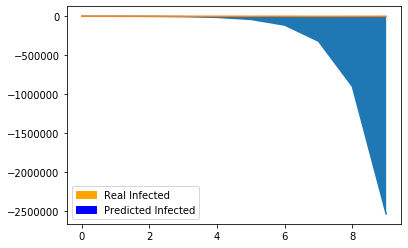

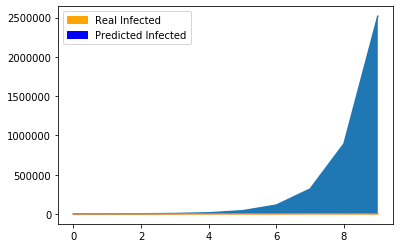

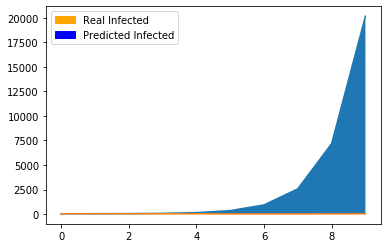

In [166]:
#Graph
import matplotlib.patches as mpatches

z = [0,1,2,3,4,5,6,7,8,9]
plt.plot(pi)
plt.plot(ri)
blue = mpatches.Patch(color='blue', label='Predicted Infected')
orange = mpatches.Patch(color='orange', label='Real Infected ')
plt.legend(handles=[orange, blue])
plt.fill_between(z, pi, ri)
plt.show()
plt.plot(pr)
plt.plot(rr)
blue = mpatches.Patch(color='blue', label='Predicted Infected')
orange = mpatches.Patch(color='orange', label='Real Infected ')
plt.legend(handles=[orange, blue])
plt.fill_between(z, pr, rr)
plt.show()
plt.plot(pd)
plt.plot(rd)
blue = mpatches.Patch(color='blue', label='Predicted Infected')
orange = mpatches.Patch(color='orange', label='Real Infected ')
plt.legend(handles=[orange, blue])
plt.fill_between(z, pd, rd)
plt.show()

Unfortunately my model does not fit very well at all. I think that the data from Japan is not only inaccurate, but inconsistent as well. The volatility of the number of actively infected and recovered people in the second half of April really messes with the results. There are also many negative numbers, as the number of infected drops dramatically and the number of recovered spikes. But once again all these numbers are very different from day to day so it would be hard to find a pattern in this short of time. The time frame of this assignment is another thing that really skews my results, as halfway through April, everyone seems to be getting cured. Looking at Japan's data, if someone didn't tell you it was covid data, you would never know because the numbers are so low and insignificant. I do think there are better ways to find a predictive model, but the Markov Model doesn't take the volatility very well. Reading more into Japan's low numbers, it seems like they just aren't testing much, and most people are being told to stay home so that panic will not spread. So basically I don't trust the data itself. One way to make the model look more like what we are looking for would be to just take the data from the first half of April, where the data looks more consistent.

In [167]:
#Change to numpy arrays
tested = np.asarray(data['Tested'])
population = np.zeros(17)
#np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)


print("Population Array:")
for i in range(17):
    population[i] = 265000
print(population)

print("Original Tested:")
print(tested[0:17])

print("Original Active:")
active = np.asarray(data['Active'])
print(active[0:17])


print("Original Recovered:")
recovered = np.asarray(data['Recovered'])
print(recovered[0:17])

print("Original Deaths:")
deaths= np.asarray(data['Deaths'])
print(deaths[0:17])

Population Array:
[265000. 265000. 265000. 265000. 265000. 265000. 265000. 265000. 265000.
 265000. 265000. 265000. 265000. 265000. 265000. 265000. 265000.]
Original Tested:
[ 2011  2002  2936  3436  1757  1533  9139  6187  2889  4384  6120  2490
  1321 10849  4685  6467  5669]
Original Active:
[227 252 309 304 321 234 336 525 584 592 578 524 272 432 490 480 461]
Original Recovered:
[ 48  29  21  61  24  -3  36   4   2  33 110 -14  15  59  52  64  84]
Original Deaths:
[ 5  3  6  6  6  3  2  7  8 12 13  9  9 14 16 18 13]


In [168]:
#Get x1 -> x17
x = np.zeros((17,4))

for i in range(17):
    if ( i == 0 ):
        x[i][0] = population[i]
        x[i][1] = active[i]
        x[i][2] = recovered[i]
        x[i][3] = deaths[i]
    else:
        change = (active[i] + recovered[i] + deaths[i]) - (active[i-1] + recovered[i-1] + deaths[i-1])     
        x[i][0] = 265000 - change
        x[i][1] = active[i]
        x[i][2] = recovered[i]
        x[i][3] = deaths[i]
    
print("x1 ... x17:")
print(x)

x1 ... x17:
[[265000.    227.     48.      5.]
 [264996.    252.     29.      3.]
 [264948.    309.     21.      6.]
 [264965.    304.     61.      6.]
 [265020.    321.     24.      6.]
 [265117.    234.     -3.      3.]
 [264860.    336.     36.      2.]
 [264838.    525.      4.      7.]
 [264942.    584.      2.      8.]
 [264957.    592.     33.     12.]
 [264936.    578.    110.     13.]
 [265182.    524.    -14.      9.]
 [265223.    272.     15.      9.]
 [264791.    432.     59.     14.]
 [264947.    490.     52.     16.]
 [264996.    480.     64.     18.]
 [265004.    461.     84.     13.]]


In [178]:
#Calculate a, b, c, d, e for transition matrixes
a = np.zeros(16)
for i in range(16):
    a[i] = x[i+1][0]/x[i][0]

d = np.zeros(16)
for i in range(16):
    d[i] = (x[i+1][2] - x[i][2])/x[i][1]

e = np.zeros(16)
for i in range(16):
    e[i] = (x[i+1][3] - x[i][3])/x[i][1]
    
c = np.zeros(16)
for i in range(16):
    c[i] = 1 - d[i] - e[i]

b = np.zeros(16)
for i in range(16):
    b[i] = (x[i+1][1] - (x[i][1] * c[i]))/x[i][0]
    
print("a:")
print(a)
print("b:")
print(b)
print("c:")
print(c)
print("d:")
print(d)
print("e:")
print(e) 

a:
[0.9999849057 0.9998188652 1.0000641635 1.0002075746 1.0003660101
 0.9990306167 0.9999169372 1.0003926929 1.0000566162 0.9999207419
 1.0009285261 1.0001546108 0.998371182  1.0005891439 1.0001849426
 1.0000301891]
b:
[ 0.0000150943  0.0001962294  0.0001321014 -0.0000754817 -0.0004414761
  0.0005280687  0.0006116439  0.0002190018  0.0001622997  0.0002415486
 -0.0006869584 -0.0008409319  0.0007880161  0.0002001579  0.0000150974
 -0.0000150946]
c:
[1.0925110132 1.0198412698 0.8705501618 1.1217105263 1.0934579439
 0.8376068376 1.0803571429 1.0019047619 0.9400684932 0.8682432432
 1.2214532872 0.9446564885 0.8198529412 1.0115740741 0.9714285714
 0.96875     ]
d:
[-0.0837004405 -0.0317460317  0.1294498382 -0.1217105263 -0.0841121495
  0.1666666667 -0.0952380952 -0.0038095238  0.0530821918  0.1300675676
 -0.214532872   0.0553435115  0.1617647059 -0.0162037037  0.0244897959
  0.0416666667]
e:
[-0.0088105727  0.0119047619  0.            0.           -0.0093457944
 -0.0042735043  0.0148809524  

In [170]:
#Create model matrix A
ak = np.mean(a)
print("ak:")
print(ak)

bk = np.mean(b)
print("bk:")
print(bk)

ck = np.mean(c)
print("ck")
print(ck)

dk = np.mean(d)
print("dk")
print(dk)

ek = np.mean(e)
print("ek")
print(ek)

A = np.array([[ak, 0, 0, 0], [bk, ck, 0, 0], [0, dk, 1, 0], [0, ek, 0, 1]])
np.set_printoptions(precision=10)
print("A:")
print(A)

ak:
1.0000011074067308
bk:
6.55822867141592e-05
ck
0.9914979222686928
dk
0.006967350079607507
ek
0.0015347276516995865
A:
[[1.0000011074 0.           0.           0.          ]
 [0.0000655823 0.9914979223 0.           0.          ]
 [0.           0.0069673501 1.           0.          ]
 [0.           0.0015347277 0.           1.          ]]


In [171]:
#Predicted and actual results for May 1-10
#apr30 = np.zeros((4,1))
#apr30[0][0] = 265026
#apr30[1][0] = -79
#apr30[2][0] = 245
#apr30[3][0] = 27
apr17 = np.array([265004,461,84,13])

print("April 17:")
print(apr17)
pmay1 = A.dot(apr17)
print("Predicted May 1")
print(pmay1)
pmay2 = A.dot(pmay1)
print("Predicted May 2")
print(pmay2)
pmay3 = A.dot(pmay2)
print("Predicted May 3")
print(pmay3)
pmay4 = A.dot(pmay3)
print("Predicted May 4")
print(pmay4)
pmay5 = A.dot(pmay4)
print("Predicted May 5")
print(pmay5)
pmay6 = A.dot(pmay5)
print("Predicted May 6")
print(pmay6)
pmay7 = A.dot(pmay6)
print("Predicted May 7")
print(pmay7)
pmay8 = A.dot(pmay7)
print("Predicted May 8")
print(pmay8)
pmay9 = A.dot(pmay8)
print("Predicted May 9")
print(pmay9)
pmay10 = A.dot(pmay9)
print("Predicted May 10")
print(pmay10)

print("Actual Results")
m = np.zeros((10, 4))
counter = 0
for i in range(29, 39):
    if ( i == 29 ):
        m[counter] = x[i-13]
        counter = counter + 1
    else:
        change = (active[i] + recovered[i] + deaths[i]) - (active[i-1] + recovered[i-1] + deaths[i-1])     
        m[counter][0] = m[0][0] - change
        m[counter][1] = active[i]
        m[counter][2] = recovered[i]
        m[counter][3] = deaths[i]
        counter = counter + 1
    
print("m1 ... m10:")
print(m)

April 17:
[265004    461     84     13]
Predicted May 1
[265004.2934672133    474.4601104743     87.2119483867     13.7075094474]
Predicted May 2
[265004.5869347515    487.8058012893     90.5176780752     14.4356764986]
Predicted May 3
[265004.8804026148    501.0380452498     93.9163918636     15.1843255505]
Predicted May 4
[265005.173870803     514.15780689       97.4072993281     15.9532824931]
Predicted May 5
[265005.4673393163    527.1660425432    100.9896167649     16.7423746967]
Predicted May 6
[265005.7608081545    540.063700412     104.6625671333     17.5514309992]
Predicted May 7
[265006.0542773177    552.8517206375    108.4253799994     18.3802816939]
Predicted May 8
[265006.3477468059    565.5310353674    112.2772914792     19.2287585169]
Predicted May 9
[265006.6412166191    578.1025688242    116.2175441835     20.0966946347]
Predicted May 10
[265006.9346867572    590.5672373728    120.2453871624     20.9839246326]
Actual Results
m1 ... m10:
[[265004.    461.     84.     13

In [172]:
#Rearrange arrays for modeling
pi = np.array([pmay1[1], pmay2[1], pmay3[1], pmay4[1], pmay5[1], pmay6[1], pmay7[1], pmay8[1], pmay9[1], pmay10[1]])
print("Predicted Infected:")
print(pi)
pr = np.array([pmay1[2], pmay2[2], pmay3[2], pmay4[2], pmay5[2], pmay6[2], pmay7[2], pmay8[2], pmay9[2], pmay10[2]])
print("Predicted Recovered:")
print(pr)
pd = np.array([pmay1[3], pmay2[3], pmay3[3], pmay4[3], pmay5[3], pmay6[3], pmay7[3], pmay8[3], pmay9[3], pmay10[3]])
print("Predicted Deaths:")
print(pd)
ri = np.array([m[0][1], m[1][1], m[2][1], m[3][1], m[4][1], m[5][1], m[6][1], m[7][1], m[8][1], m[9][1]])
print("Real Infected:")
print(ri)
rr = np.array([m[0][2], m[1][2], m[2][2], m[3][2], m[4][2], m[5][2], m[6][2], m[7][2], m[8][2], m[9][2]])
print("Real Recovered:")
print(rr)
rd = np.array([m[0][3], m[1][3], m[2][3], m[3][3], m[4][3], m[5][3], m[6][3], m[7][3], m[8][3], m[9][3]])
print("Real Deaths:")
print(rd)


Predicted Infected:
[474.4601104743 487.8058012893 501.0380452498 514.15780689
 527.1660425432 540.063700412  552.8517206375 565.5310353674
 578.1025688242 590.5672373728]
Predicted Recovered:
[ 87.2119483867  90.5176780752  93.9163918636  97.4072993281
 100.9896167649 104.6625671333 108.4253799994 112.2772914792
 116.2175441835 120.2453871624]
Predicted Deaths:
[13.7075094474 14.4356764986 15.1843255505 15.9532824931 16.7423746967
 17.5514309992 18.3802816939 19.2287585169 20.0966946347 20.9839246326]
Real Infected:
[  461.  -174.   107.   -16.   -27.  -520.  -181. -1372.  -627.  -329.]
Real Recovered:
[  84.  418.  172.  191.  175.  635.  271. 1459.  701.  425.]
Real Deaths:
[13. 29. 25. 23. 19. 10. 11. 11. 15. 18.]


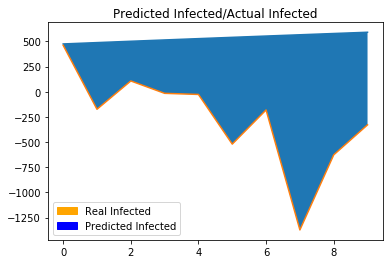

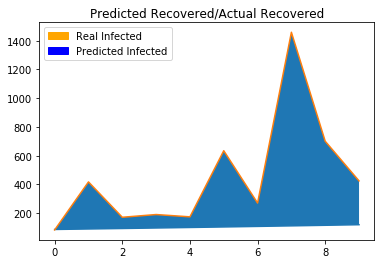

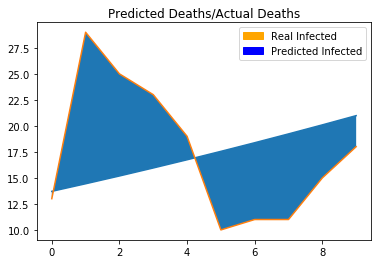

In [176]:
#Graph
import matplotlib.patches as mpatches

z = [0,1,2,3,4,5,6,7,8,9]
plt.plot(pi)
plt.plot(ri)
blue = mpatches.Patch(color='blue', label='Predicted Infected')
orange = mpatches.Patch(color='orange', label='Real Infected ')
plt.legend(handles=[orange, blue])
plt.fill_between(z, pi, ri)
plt.title('Predicted Infected/Actual Infected')
plt.show()
plt.plot(pr)
plt.plot(rr)
blue = mpatches.Patch(color='blue', label='Predicted Infected')
orange = mpatches.Patch(color='orange', label='Real Infected ')
plt.legend(handles=[orange, blue])
plt.fill_between(z, pr, rr)
plt.title('Predicted Recovered/Actual Recovered')
plt.show()
plt.plot(pd)
plt.plot(rd)
blue = mpatches.Patch(color='blue', label='Predicted Infected')
orange = mpatches.Patch(color='orange', label='Real Infected ')
plt.legend(handles=[orange, blue])
plt.fill_between(z, pd, rd)
plt.title('Predicted Deaths/Actual Deaths')
plt.show()

The graphs and results are much better the second time, however they are still pretty far off. I think that Japan's data is so screwed up that it is hard to find a predictive model based on prior data because the data itself is corrupt. And thats pretty much my final conclusion. 126 million citizens, with only 16000 confirmed cases and 825 deaths. Covid is supposed to be bad for the elderly, and Japan literally the oldest population in the world with 26% of the population over the age of 65. Yet no deaths. Maybe they are immune, or maybe they just aren't reporting, but I did my best. 